In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def draw (x1, x2):
    ln = plt.plot(x1, x2)
    
def sigmoid(score):
    return 1 / (1 + np.exp(-score)) #exponential e^(1 / score)
def calculate_error(line_parameters, points, y):
    m = points.shape[0]
    p = sigmoid(points * line_parameters) #olasılık hesaplama 
    cross_entropy = -(1 / m) * (np.log(p).T * y + np.log(1 - p).T * (1 - y))
    return cross_entropy
def gradient_descent(line_parameters, points, y, alpha):
    m = points.shape[0]
    for i in range(2000):
        p = sigmoid(points * line_parameters) #olasılık hesaplama 
        gradient = points.T * (p - y) * (alpha / m )
        line_parameters = line_parameters - gradient
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)
        x1 = np.array([points[:, 0].min(), points[:, 0].max()])
        #w1x1 + w2x2 + b = 0
        x2 = - b / w2 + x1 * (- w1 / w2)
    draw(x1, x2)

In [3]:
n_pts = 100 #horizontally align
np.random.seed(0)
bias = np.ones(n_pts)
ran_x1_val = np.random.normal(10, 3, n_pts) #normal distripution 
ran_x2_val = np.random.normal(12, 3, n_pts)

#top_region(100 row) #nested array with vertically and horizontally coordinates
top_region = np.array([ran_x1_val, ran_x2_val, bias]).T # transpoze()
bottom_region = np.array([np.random.normal(5, 3, n_pts),
                          np.random.normal(6, 3, n_pts), bias]).T
all_points = np.vstack((top_region, bottom_region))

line_parameters = np.matrix([np.zeros(3)]).T # T for matrix multipication(1 row)

#print(x1, x2)  ##Points (-3.3, 11.8), (16.8, 0.3)
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts * 2, 1 )

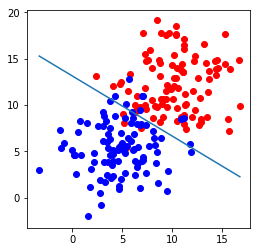

In [4]:
_, ax = plt.subplots(figsize=(4, 4))
ax.scatter(top_region[:, 0], top_region[:, 1], color='r') #1st argument which row --> : (all row)
                                                          #2nd argument which index
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color='b')
gradient_descent(line_parameters, all_points, y, 0.06)
plt.show()  

In [5]:
print(calculate_error(line_parameters, all_points, y))

[[0.69314718]]
